# Temperature Trends - Boston

In this notebook we analyze data related to global temperature trends and compare them to Boston's temperature in the last years. This is done to understand if the temperature in Boston follows global temperature trends and if it is cooler or hotter than the average global trends.

Data comes from Udacity Data Analyst Nanodegree [database](https://classroom.udacity.com/nanodegrees/nd002/parts/ca2cdcb3-c3df-428a-92e7-8b2630c7549d/modules/188c878c-5365-4bf3-9fa8-08cf57336fc4/lessons/dce89631-d141-4a36-b3fd-5e8ec038bc70/concepts/530f21c0-2f37-4390-aaab-3ce440e56d80).

In order to retrieve the data of Boston, I used the following SQL queries:

Looking at table *city_list* to find if Boston was listed as a city and to find if country is listed as 'USA', United States' or 'United States of America'.

**SELECT** *

**FROM** city_list

**WHERE** city = 'Boston';


Once, I figured the country was listed as 'United States', it was easy to look into the *city_data* table to find the historical average temperatures in the city of Boston,MA in the United States of America. The result was stored in **boston_temp.csv**.

**SELECT** *

**FROM** city_data

**WHERE** country = 'United States' **AND** city = 'Boston';


Finally, the data of the global average temperatures is required to compare it against the data of our chosen city since the goal is to figure out if the average temperature in such city follows the global trends. The result was stored in **global_temp.csv**.

**SELECT** *

**FROM** global_data


After the queries were completed and the data was exported to 2 csv files, I decided to use Python, Pandas and Matplotlib to wrangle, visualize and analyze the data.

In [1]:
boston_csv = 'data/boston_temp.csv'
global_csv = 'data/global_temp.csv'

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#%matplotlib notebook #creates interactive plots
%matplotlib inline

## Reading and Exploring Data

In [3]:
df_boston = pd.read_csv(boston_csv, index_col='year')
df_global = pd.read_csv(global_csv, index_col='year')

In [4]:
print('\nBoston')
print(df_boston.columns)
print('\nGlobal')
print(df_global.columns)

print('\nBoston head')
print(df_boston.head(8))
print('\nGlobal head')
print(df_global.head())

print('\nBoston tail')
print(df_boston.tail())
print('\nGlobal tail')
print(df_global.tail())

print('\nBoston\n')
print(df_boston.info())
print('\nGlobal\n')
print(df_global.info())


Boston
Index(['city', 'country', 'avg_temp'], dtype='object')

Global
Index(['avg_temp'], dtype='object')

Boston head
        city        country  avg_temp
year                                 
1743  Boston  United States      1.19
1744  Boston  United States      9.63
1745  Boston  United States     -1.37
1746  Boston  United States       NaN
1747  Boston  United States       NaN
1748  Boston  United States       NaN
1749  Boston  United States       NaN
1750  Boston  United States      7.88

Global head
      avg_temp
year          
1750      8.72
1751      7.98
1752      5.78
1753      8.39
1754      8.47

Boston tail
        city        country  avg_temp
year                                 
2009  Boston  United States      8.07
2010  Boston  United States      9.58
2011  Boston  United States      9.12
2012  Boston  United States     10.06
2013  Boston  United States     10.38

Global tail
      avg_temp
year          
2011      9.52
2012      9.51
2013      9.61
2014      9.57


After checking the information in **boston dataset** and **global dataset**, one can tell that **boston information** lacks of 5 values in the whole dataset, meaning that 5 years of data *average temperature* are unknown. On the other hand, **global information** is complete.
In this scenario, one can drop the NaN values now, however, it will be easier to combine datasets first before start cleaning the data as datasets are small. Then one can clean a single dataset rather than modifying two datasets independently.

## Tidying Data

Boston dataset starts in the year 1743 and finishes in 2013, while global data starts in 1750 and ends in 2015. In order to compare data we want to do it for information we have available in both datasets.
Moreover, the Boston-temperature dataset has two extra columns _city_ and _country_ that add no value. We can create a tidy dataset by naming the *avg_temp* column as *boston_avg_temp* and remove *city* and *country*.

Another advantage of dropping the years 1743 to 1749 from the Boston dataset is that 4 NaN values will have been removed from our dataset.

In [5]:
#df_boston_short = df_boston.loc[:,['year','avg_temp']].iloc[7:]
#boston_col_names = ['year','boston_avg_temp'] 
#df_boston_short.columns = boston_col_names
df_boston_short = pd.DataFrame(df_boston.loc['1750':,'avg_temp'])
boston_col_names = ['boston_avg_temp']
df_boston_short.columns = boston_col_names

df_global_short = df_global.iloc[:264]
#global_col_names = ['year','global_avg_temp']
global_col_names = ['global_avg_temp']
df_global_short.columns = global_col_names

In [6]:
print('\nBoston')
print(df_boston_short.columns)
print('\nGlobal')
print(df_global_short.columns)

print('\nBoston')
print(df_boston_short.info())
print('\nGlobal')
print(df_global_short.info())


Boston
Index(['boston_avg_temp'], dtype='object')

Global
Index(['global_avg_temp'], dtype='object')

Boston
<class 'pandas.core.frame.DataFrame'>
Int64Index: 264 entries, 1750 to 2013
Data columns (total 1 columns):
boston_avg_temp    263 non-null float64
dtypes: float64(1)
memory usage: 4.1 KB
None

Global
<class 'pandas.core.frame.DataFrame'>
Int64Index: 264 entries, 1750 to 2013
Data columns (total 1 columns):
global_avg_temp    264 non-null float64
dtypes: float64(1)
memory usage: 4.1 KB
None


## Merging Datasets

In [7]:
df_temp = pd.merge(left=df_boston_short, right=df_global_short, left_index=True, right_index=True)#on='year')

print(df_temp.columns)
print(df_temp.head())
print(df_temp.tail())

Index(['boston_avg_temp', 'global_avg_temp'], dtype='object')
      boston_avg_temp  global_avg_temp
year                                  
1750             7.88             8.72
1751             8.60             7.98
1752             0.36             5.78
1753             7.35             8.39
1754             7.75             8.47
      boston_avg_temp  global_avg_temp
year                                  
2009             8.07             9.51
2010             9.58             9.70
2011             9.12             9.52
2012            10.06             9.51
2013            10.38             9.61


## Cleaning Data

After the merge, one can notice that *boston_avg_temp* has only one missing value as we remove the other to have a good merge and a one-to-one analysis of data between Boston and global temperatures over the years. 

In [8]:
print(df_temp.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264 entries, 1750 to 2013
Data columns (total 2 columns):
boston_avg_temp    263 non-null float64
global_avg_temp    264 non-null float64
dtypes: float64(2)
memory usage: 16.2 KB
None


In [9]:
print(df_temp[df_temp.boston_avg_temp.isnull()])

      boston_avg_temp  global_avg_temp
year                                  
1780              NaN             9.43


In [10]:
print(df_temp.loc['1775':'1785'])

      boston_avg_temp  global_avg_temp
year                                  
1775             8.08             9.18
1776             6.83             8.30
1777             6.56             8.26
1778             4.75             8.54
1779            -2.31             8.98
1780              NaN             9.43
1781             7.61             8.10
1782             6.98             7.90
1783             6.64             7.68
1784             6.24             7.86
1785             6.32             7.36


The missing value in the **boston dataset** happens to be the year 1780. Unfortunately, average temperatures in Boston vary around 1780, so the safest option to avoid assigning a wrong value will be to remove this year from the dataset. It is only one point out of 264 data points. This justifies also that we can remove it without biasing our results.

Another observation that we might confirm later is that the year 1779 in Boston the average temperature was -2.31 which seems very far from the global temperature. This specific value in Boston might be an outlier or an important indicator that temperature is cooler in Boston.

In [11]:
df_temp = df_temp.dropna()
print(df_temp.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1750 to 2013
Data columns (total 2 columns):
boston_avg_temp    263 non-null float64
global_avg_temp    263 non-null float64
dtypes: float64(2)
memory usage: 6.2 KB
None


## Exploratory Data Analysis

Visualizing the data is very important to understand it and start thinking how to extract the best out of out even before doing statistics.

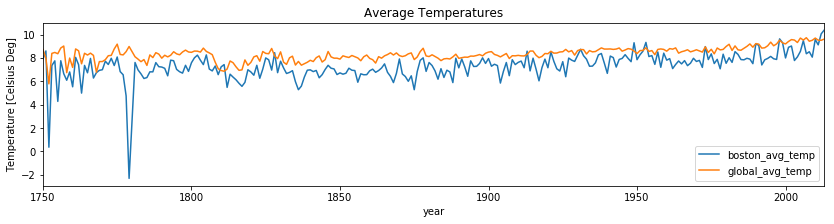

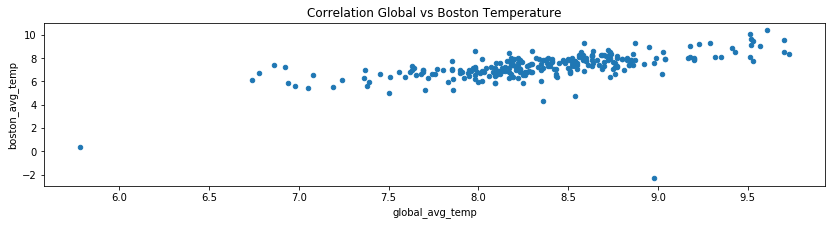

In [12]:
fig_size = (14,3)
avg_temp_cols = ['boston_avg_temp','global_avg_temp']
df_temp.plot(kind='line', figsize=fig_size)
#df_temp.plot(kind='line',x='year',y=avg_temp_cols, figsize=fig_size)
plt.title('Average Temperatures')
plt.ylabel('Temperature [Celsius Deg]')
plt.show()

df_temp.plot(kind='scatter',x='global_avg_temp',y='boston_avg_temp',figsize=fig_size)
plt.title('Correlation Global vs Boston Temperature')
plt.show()

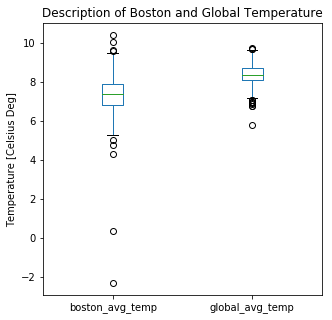

In [13]:
df_temp[avg_temp_cols].plot(kind='box', figsize=(5,5))
plt.title('Description of Boston and Global Temperature')
plt.ylabel('Temperature [Celsius Deg]')
plt.show()

After visualizing the data one can clearly see that there are 2 outliers in *boston_avg_temp* that correspond to the  smallest 2 temperatures of the dataset. Depending on how strict our model is, one can say there is 1 outlier for the global temperature which corresponds to the minimum value of *global_avg_temp* data. 

From looking at the scatter plot, one can also see that there is a quiet strong positive correlation between the global and Boston's average temperature. 

## Descriptive Statistics

It will be a good idea to explore the data with number and see how the considered outliers affect our statistics. In order to identify the outliers in Boston's temperature, we can see in the box plot that they have a temperature smaller than 2 degrees.
As for the global temperature we can identify the possible outlier as the minimum temperature of the data.

**Boston outliers**

In [14]:
boston_outliers = df_temp['boston_avg_temp']<=2
print(df_temp[boston_outliers])

      boston_avg_temp  global_avg_temp
year                                  
1752             0.36             5.78
1779            -2.31             8.98


**Possible global outlier**

In [15]:
global_outliers = df_temp['global_avg_temp'] == df_temp['global_avg_temp'].min()
print(df_temp[global_outliers] )

      boston_avg_temp  global_avg_temp
year                                  
1752             0.36             5.78


Once one finds the outliers, it can be realized that the possible outlier of global temperature in the year 1752 is actually 1 of the 2 outlier of Boston's temperature data.

In order to understand how much the outliers are affecting us we can run descriptive statistics to see results with and without outliers

In [16]:
df_temp.describe()

,boston_avg_temp,global_avg_temp
count,263.000000,263.000000
mean,7.303764,8.355323
std,1.156479,0.572458
min,-2.310000,5.780000
25%,6.805000,8.075000
50%,7.360000,8.360000
75%,7.910000,8.700000
max,10.380000,9.730000


If we remove the outliers 

In [17]:
print('Outliers\n')
print(df_temp.loc[[1779,1752]])

df_temp_clean = df_temp[ boston_outliers == False ]

print('\nDataset Information without outliers\n')
df_temp_clean.info()
df_temp_clean.describe()

Outliers

      boston_avg_temp  global_avg_temp
year                                  
1779            -2.31             8.98
1752             0.36             5.78

Dataset Information without outliers

<class 'pandas.core.frame.DataFrame'>
Int64Index: 261 entries, 1750 to 2013
Data columns (total 2 columns):
boston_avg_temp    261 non-null float64
global_avg_temp    261 non-null float64
dtypes: float64(2)
memory usage: 6.1 KB


,boston_avg_temp,global_avg_temp
count,261.000000,261.000000
mean,7.367203,8.362797
std,0.895973,0.550603
min,4.280000,6.740000
25%,6.810000,8.080000
50%,7.370000,8.360000
75%,7.910000,8.700000
max,10.380000,9.730000


After removing the outliers, the mean and the median (50% quantile) for both datasets became even more identical. This indicates the suspected outliers were skewing our distribution and it is a good idea to leave them out of our analysis.

Now we can run a visualization again to see our data without outliers and start doing some deductions from it.

## Clean Data Visualization

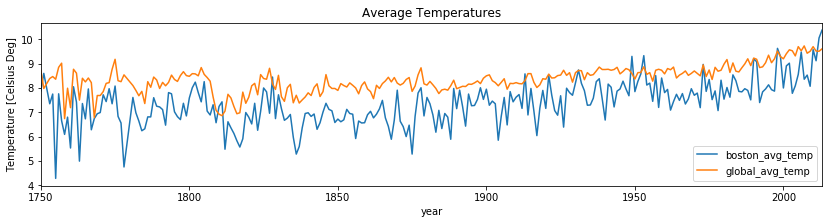

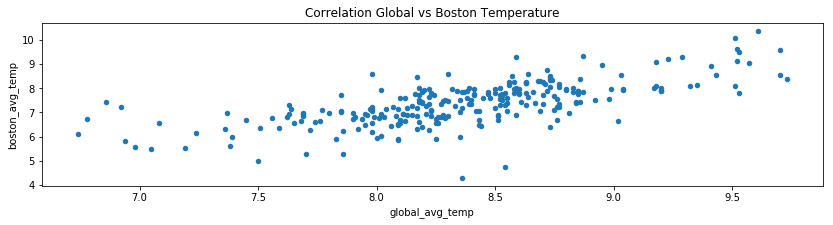

In [18]:
df_temp_clean.plot(kind='line', figsize=fig_size)
plt.title('Average Temperatures')
plt.ylabel('Temperature [Celsius Deg]')
plt.show()

df_temp_clean.plot(kind='scatter',x='global_avg_temp',y='boston_avg_temp',figsize=fig_size)
plt.title('Correlation Global vs Boston Temperature')
plt.show()

The scatter plot has no outliers on it and a trend can be seen on the points.
The line graph has no significant spikes which makes it smoother, but the *boston_avg_temp* is still jumping up and down a lot to find a trend. Thus, taking a moving average will smooth the trend and let us understand a trend better.

## Moving Average

Since the Boston and global average temperatures dataset has 261 data points, I decided to do a moving average with a time period divisible by 3. Thus, the moving averages taken are 3 years and 9 years.

In [19]:
df_temp_ma = df_temp_clean.copy()
df_temp_ma['boston3yMA'] = df_temp_ma['boston_avg_temp'].rolling(window=3).mean()
df_temp_ma['global3yMA'] = df_temp_ma['global_avg_temp'].rolling(window=3).mean()
df_temp_ma.loc[:,'boston9yMA'] = df_temp_ma.loc[:,'boston_avg_temp'].rolling(window=9).mean()
df_temp_ma.loc[:,'global9yMA'] = df_temp_ma.loc[:,'global_avg_temp'].rolling(window=9).mean()
print(df_temp_ma.head(11))
df_temp_ma.info()

      boston_avg_temp  global_avg_temp  boston3yMA  global3yMA  boston9yMA  \
year                                                                         
1750             7.88             8.72         NaN         NaN         NaN   
1751             8.60             7.98         NaN         NaN         NaN   
1753             7.35             8.39    7.943333    8.363333         NaN   
1754             7.75             8.47    7.900000    8.280000         NaN   
1755             4.28             8.36    6.460000    8.406667         NaN   
1756             7.76             8.85    6.596667    8.560000         NaN   
1757             6.65             9.02    6.230000    8.743333         NaN   
1758             6.09             6.74    6.833333    8.203333         NaN   
1759             6.80             7.99    6.513333    7.916667    7.017778   
1760             5.53             7.19    6.140000    7.306667    6.756667   
1761             8.05             8.77    6.793333    7.983333  

## Moving Average Visualizations



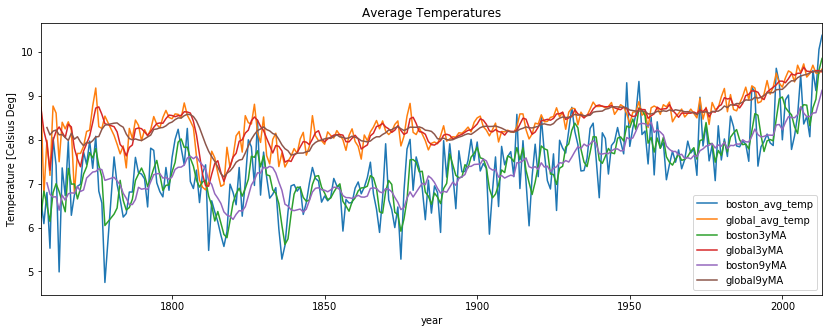

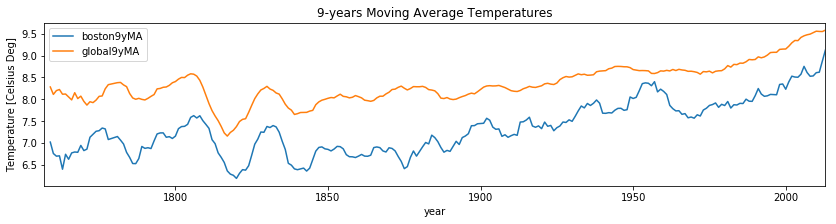

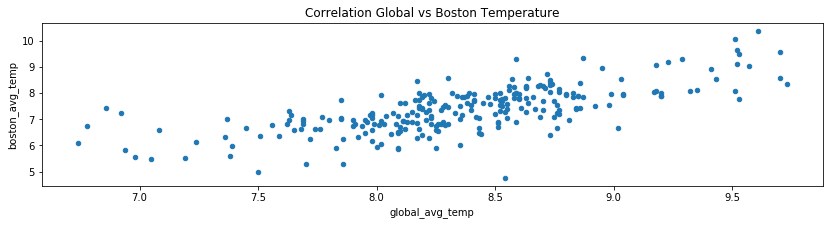

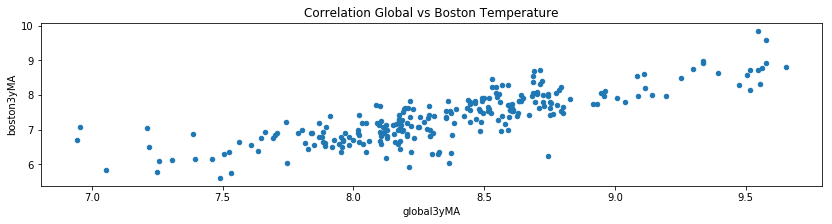

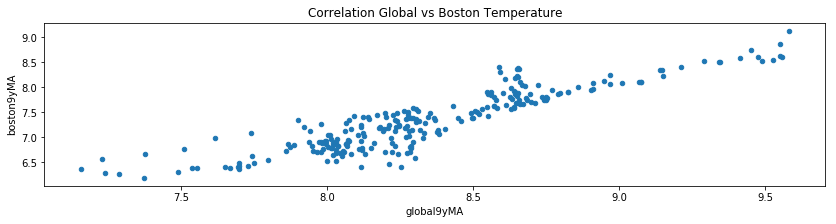

In [20]:
df_temp_ma.loc['1757':].plot(kind='line', figsize=(14,5))
plt.title('Average Temperatures')
plt.ylabel('Temperature [Celsius Deg]')
plt.show()

df_temp_ma.loc['1757':].plot(kind='line' 
                             ,y=['boston9yMA','global9yMA']
                             ,figsize=fig_size)
plt.title('9-years Moving Average Temperatures')
plt.ylabel('Temperature [Celsius Deg]')
plt.show()

df_temp_ma.loc['1757':].plot(kind='scatter'     ,x='global_avg_temp'
                             ,y='boston_avg_temp',figsize=fig_size)
plt.title('Correlation Global vs Boston Temperature')
plt.show()

df_temp_ma.loc['1757':].plot(kind='scatter',x='global3yMA'
                             ,y='boston3yMA',figsize=fig_size)
plt.title('Correlation Global vs Boston Temperature')
plt.show()

df_temp_ma.loc['1757':].plot(kind='scatter',x='global9yMA'
                             ,y='boston9yMA',figsize=fig_size)
plt.title('Correlation Global vs Boston Temperature')
plt.show()

After doing moving averages by 3 years and 9 years, it is clear the correlation between Boston and global average temperature is strongly positive related. This means that when global average temperature goes up or down the average temperature in Boston tends to increase or decrease respectively.
One can see that string correlation specially in the plot of 9 years moving average when the scatter plot at the most right side seems almost a straight line.

## Correlation Coefficient

As a good exercise, it will be good to know what is the actual correlation coefficients of our data and to prove that the moving average smoothen the data to a point were it increases the correlation strength. In this case, the higher the moving average the closer the correlation coefficient gets to 1.

In [21]:
df_temp_ma.loc['1757':].corr(method='pearson')

,boston_avg_temp,global_avg_temp,boston3yMA,global3yMA,boston9yMA,global9yMA
boston_avg_temp,1.000000,0.710821,0.833391,0.682798,0.719684,0.673129
global_avg_temp,0.710821,1.000000,0.749150,0.910727,0.748267,0.825572
boston3yMA,0.833391,0.749150,1.000000,0.817319,0.873629,0.810525
global3yMA,0.682798,0.910727,0.817319,1.000000,0.824178,0.911569
boston9yMA,0.719684,0.748267,0.873629,0.824178,1.000000,0.905941
global9yMA,0.673129,0.825572,0.810525,0.911569,0.905941,1.000000


## Conclusions from Data



From the year 1750 to 2013 (1757 to 2013 with moving average), Boston's average temperature follows the global trends of temperature. Moreover, Boston's average temperature is in average cooler than the global average trends for around 1 degree.